In [146]:
import pandas as pd
import glob

path = "output/csv"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    cols = pd.read_csv(filename, nrows=1).columns
    df = pd.read_csv(filename, index_col=None, usecols=[cols[1]])
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [147]:
df.set_index('start', drop=False, inplace=True)
df['start'] = pd.to_datetime(df['start'])

df.index = df['start']
del df['start']
df['count'] = 1

(735764.0, 735765.3125)

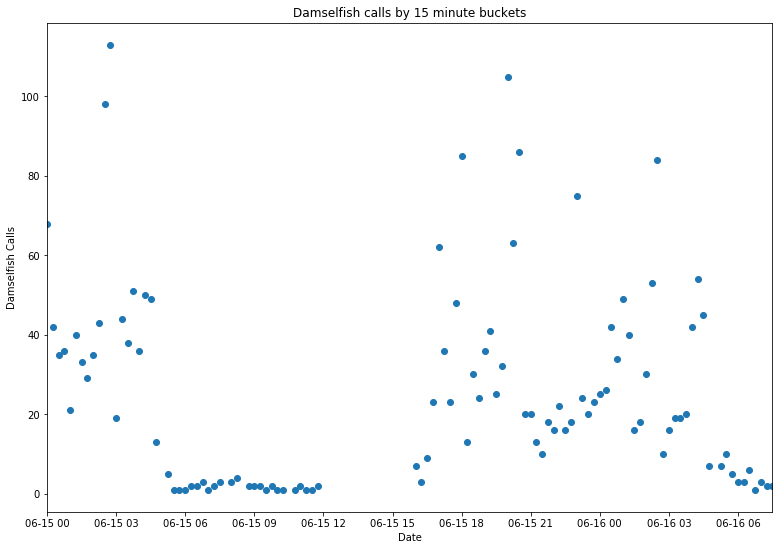

In [148]:
from matplotlib import pyplot as plt
import numpy as np

resampled = df.resample('15T').count()
resampled[resampled['count']==0] = np.nan

fig, ax = plt.subplots(figsize=(13, 9))

# Add x-axis and y-axis
ax.scatter(resampled.index.values,
           resampled['count'])


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Damselfish Calls",
       title="Damselfish calls by 15 minute buckets")

ax.set_xlim([resampled.index.values.min(), resampled.index.values.max()])

In [149]:
resampled.to_csv("resampled_data.csv")

In [152]:
resampled.head(20)

,count
start,
2015-06-15 00:00:00,68.0
2015-06-15 00:15:00,42.0
2015-06-15 00:30:00,35.0
2015-06-15 00:45:00,36.0
2015-06-15 01:00:00,21.0
2015-06-15 01:15:00,40.0
2015-06-15 01:30:00,33.0
2015-06-15 01:45:00,29.0
2015-06-15 02:00:00,35.0
